In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
from pyod.models.knn import KNN
import pickle
import sklearn

In [3]:
with open('/raid/mpsych/datasetA.pkl','rb') as f:
    datasetA_X = pickle.load(f)
    
with open('/raid/mpsych/datasetA_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
X_feat_vect = O.Features.get_features(datasetA_X, 'hist', 'gaussian') # commented out normalized_pixels *= 255 in code

In [5]:
np.where(labels > 0)

(array([27, 38, 47, 48, 61, 63, 81, 90]),)

0
[4390715       1]


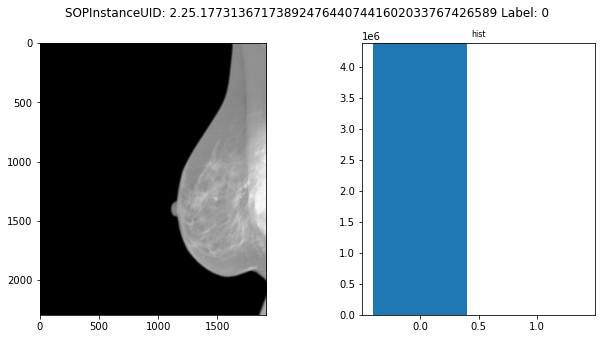

1
[7330427       1]


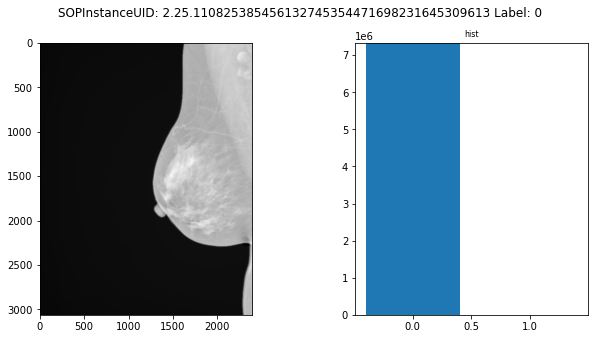

2
[4390715       1]


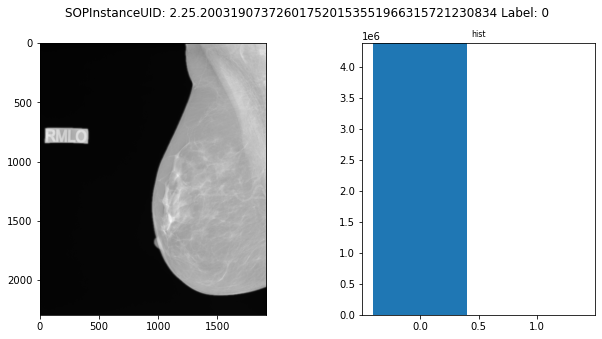

3
[4390715       1]


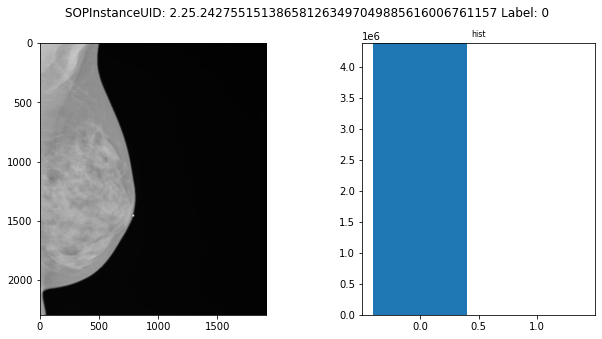

4
[7330427       1]


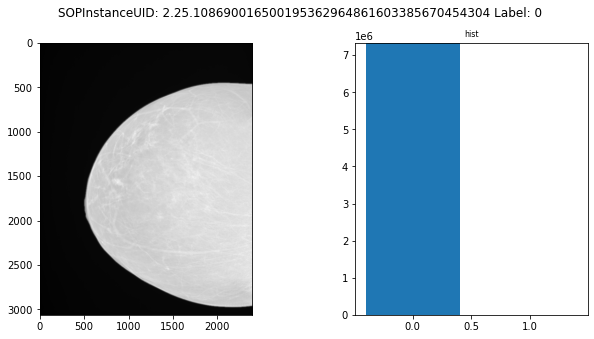

5
[4390715       1]


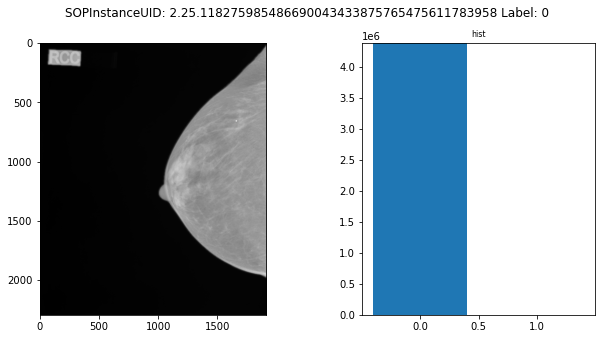

6
[4390715       1]


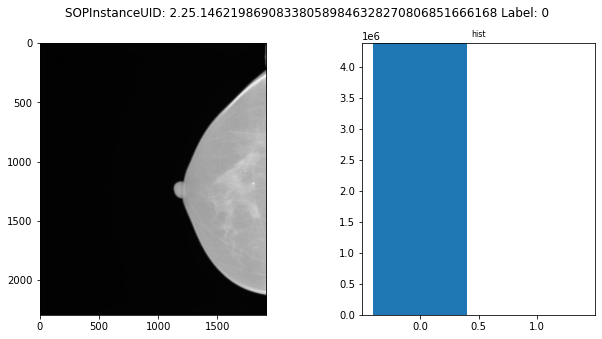

7
[7330312     116]


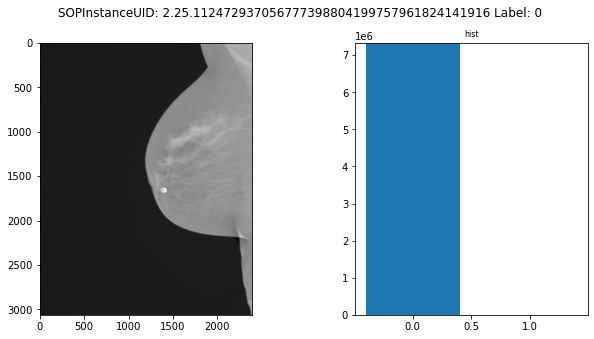

8
[4390715       1]


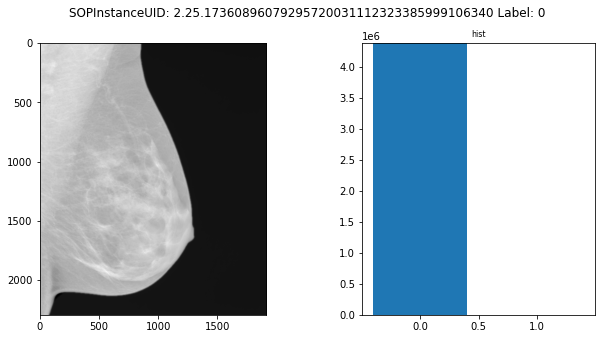

9
[4390715       1]


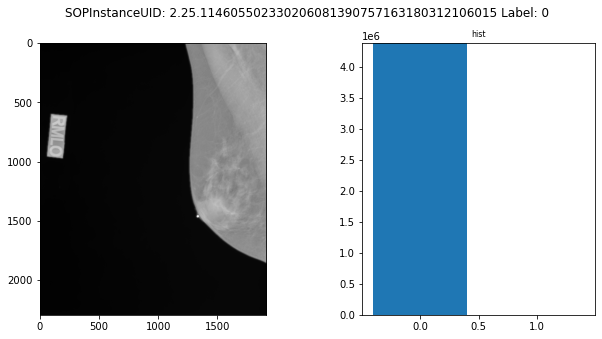

10
[7330427       1]


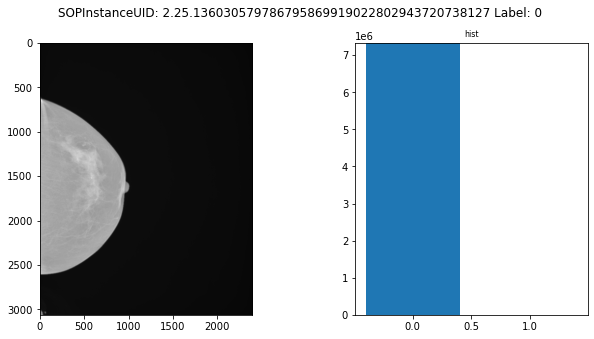

11
[13631022      466]


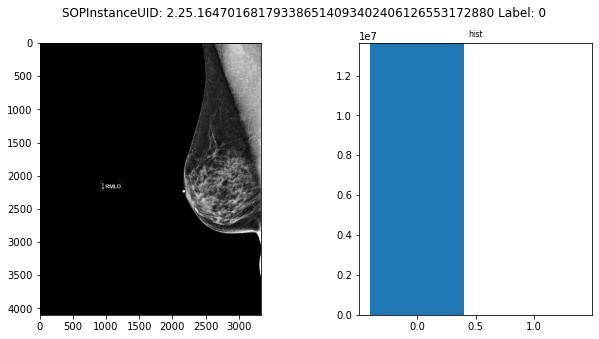

12
[7330427       1]


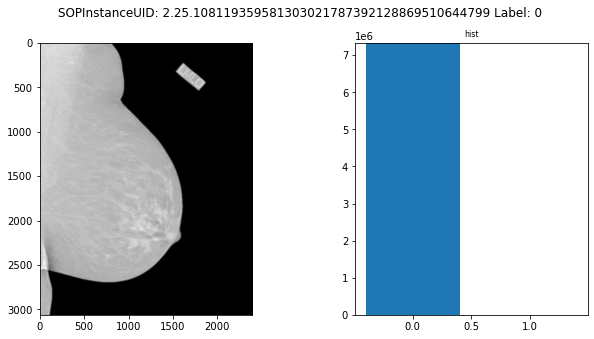

13
[7330427       1]


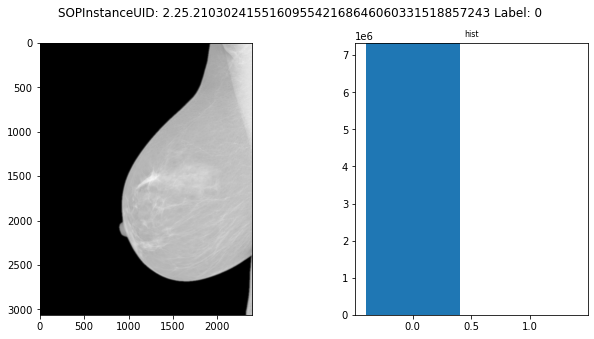

14
[7330427       1]


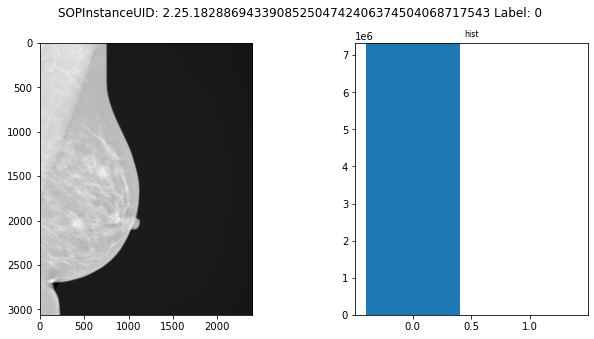

15
[7330427       1]


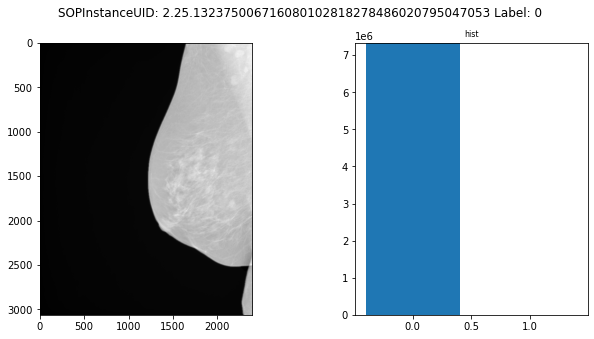

16
[4390715       1]


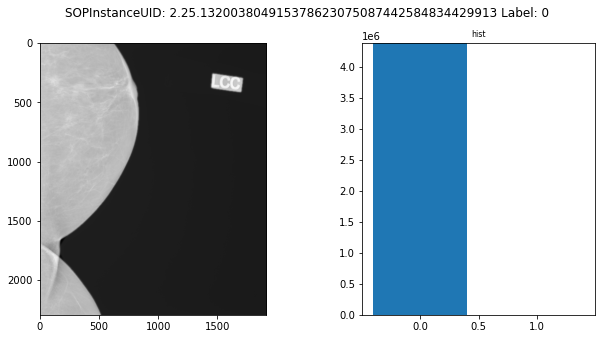

17
[7330427       1]


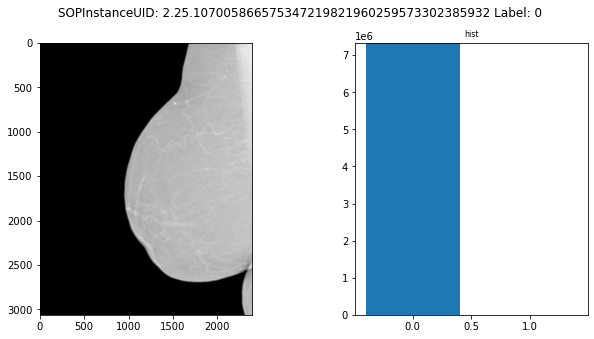

18
[7330427       1]


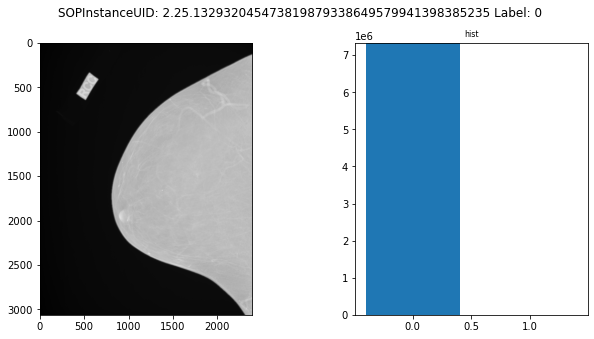

19
[4390715       1]


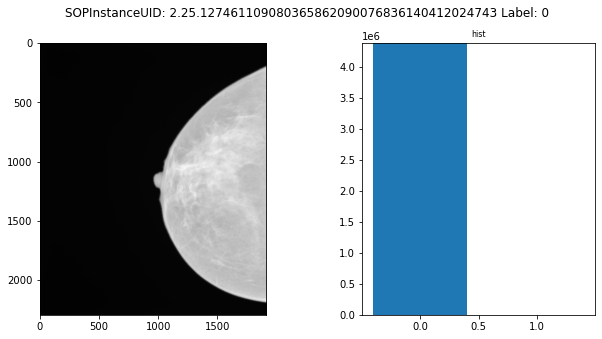

20
[7329452     976]


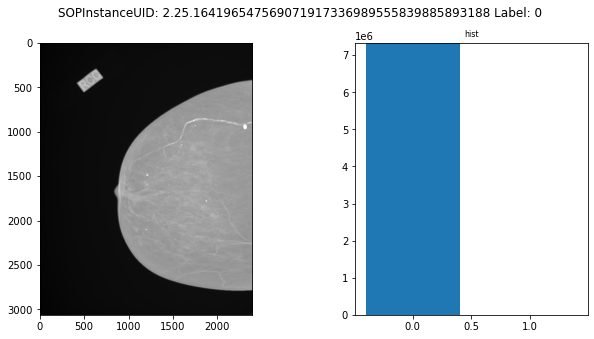

21
[7330427       1]


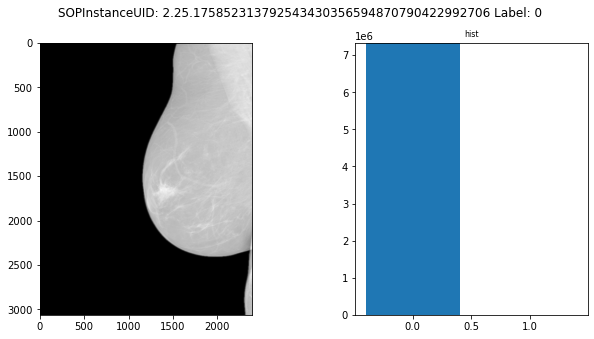

22
[7330427       1]


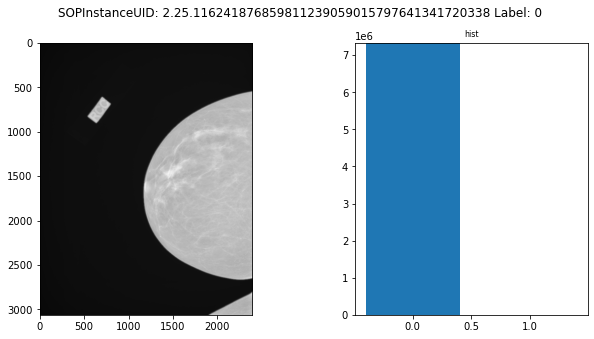

23
[7330427       1]


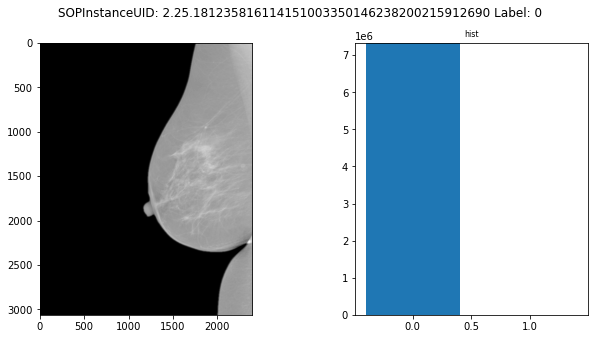

24
[4390715       1]


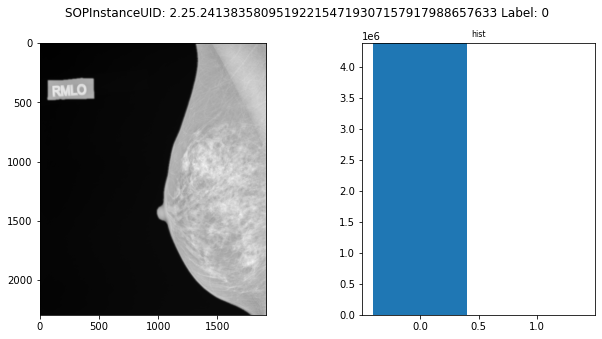

25
[7330427       1]


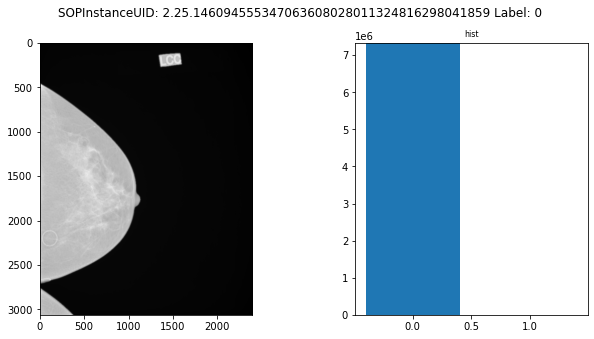

26
[7330427       1]


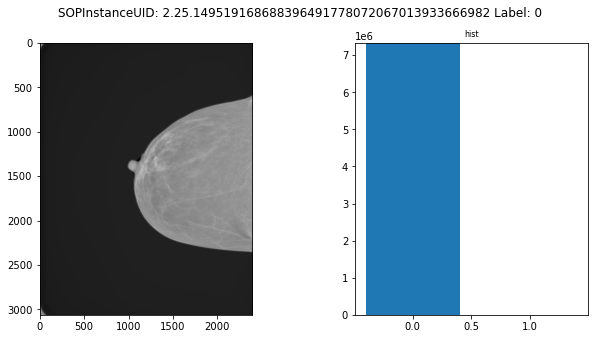

27
[4390715       1]


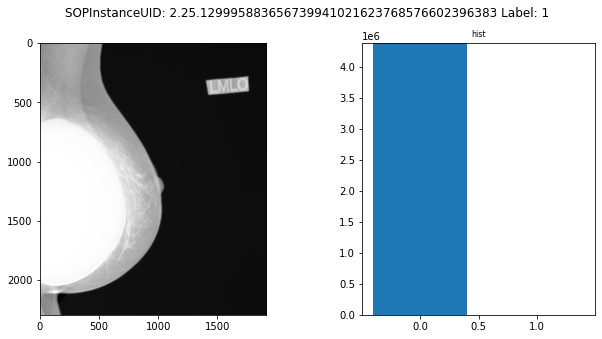

28
[13631336      152]


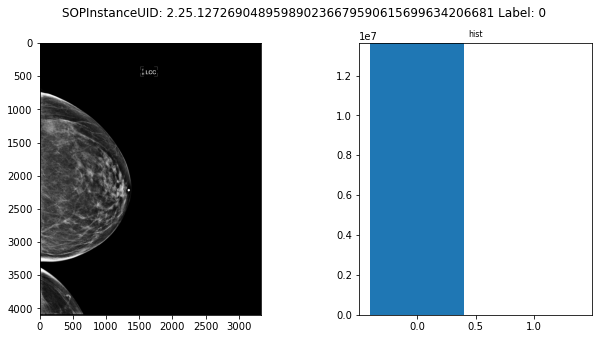

29
[4390715       1]


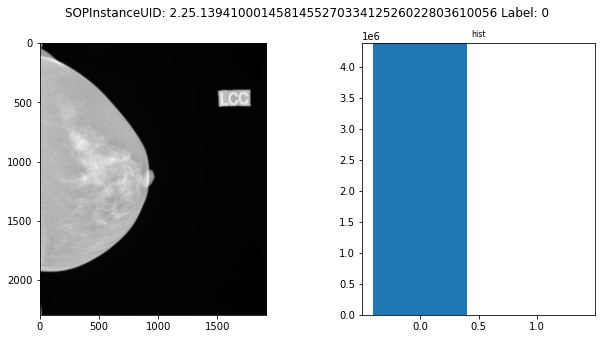

30
[7330427       1]


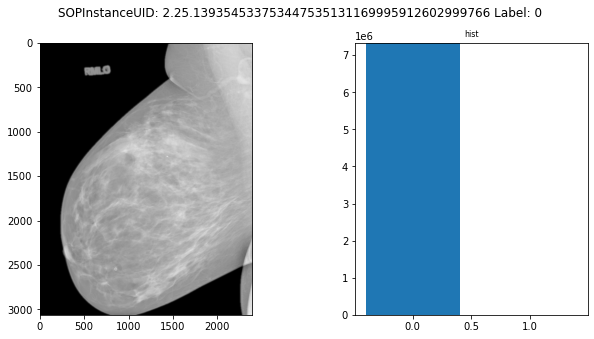

31
[7330378      50]


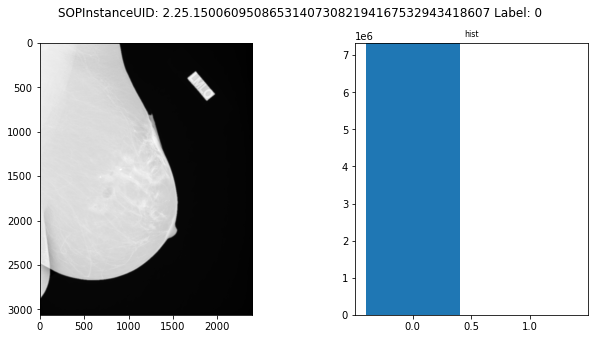

32
[4390711       5]


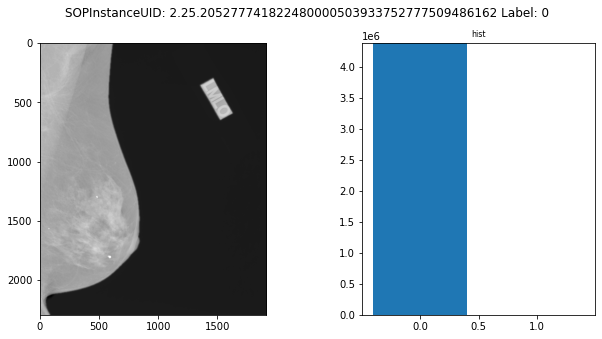

33
[7330427       1]


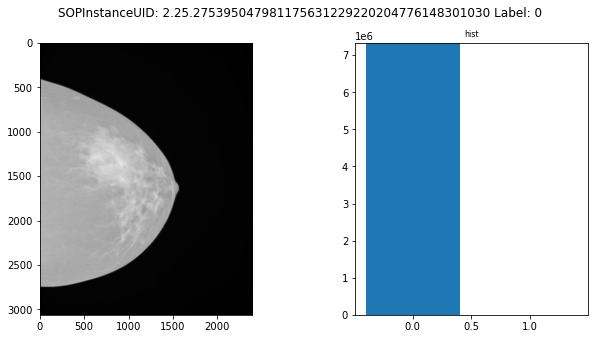

34
[4390715       1]


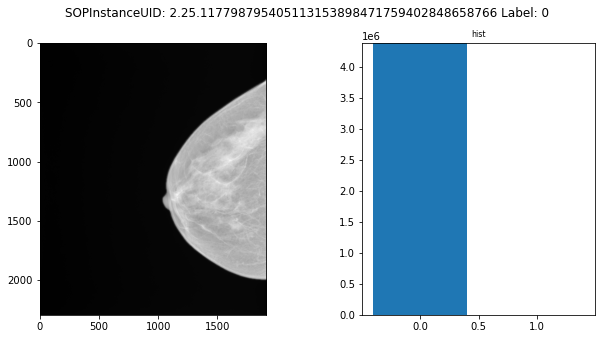

35
[4390715       1]


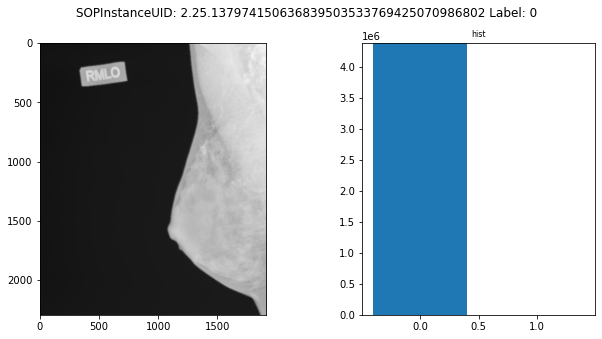

36
[7330427       1]


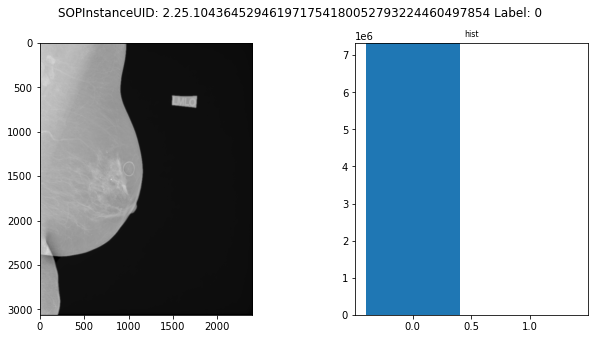

37
[4390715       1]


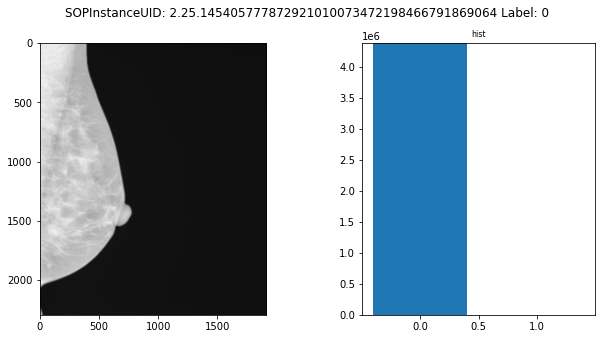

38
[7330037     391]


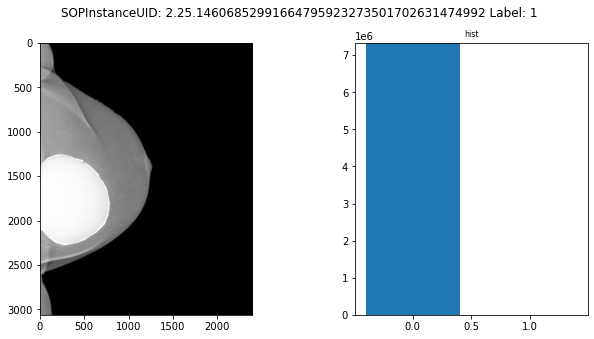

39
[7330427       1]


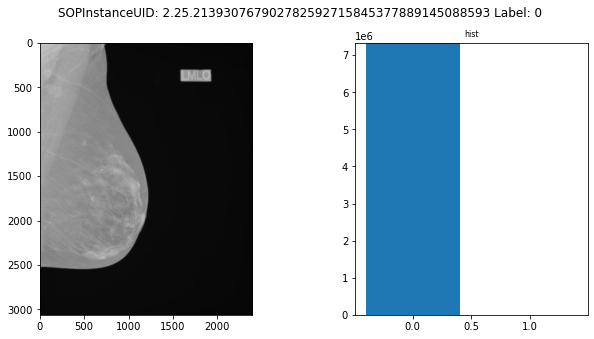

40
[4390715       1]


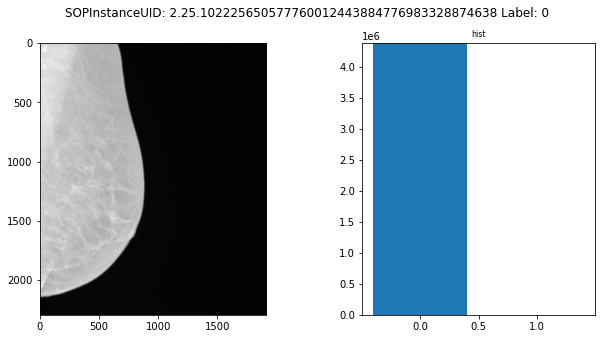

41
[4390715       1]


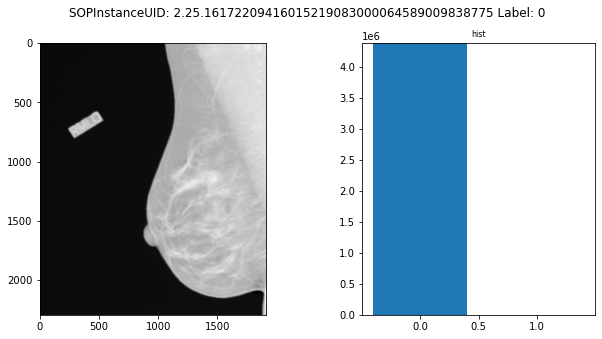

42
[4390715       1]


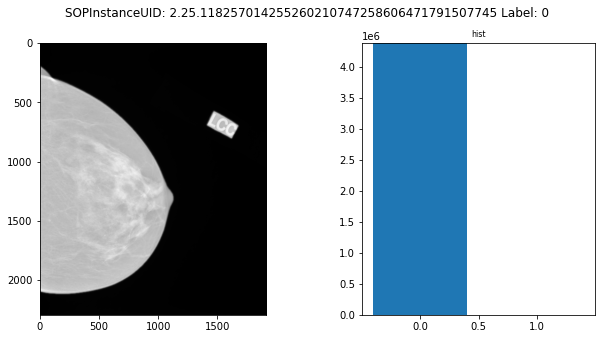

43
[4390715       1]


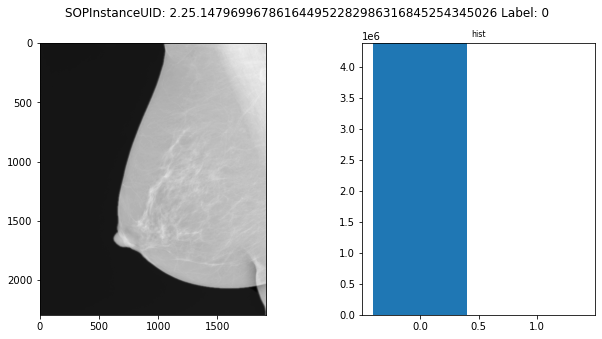

44
[7330427       1]


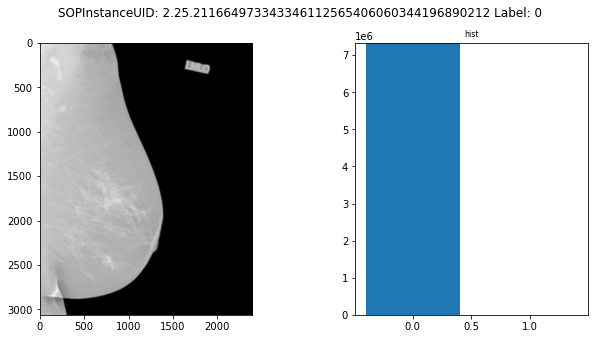

45
[13631022      466]


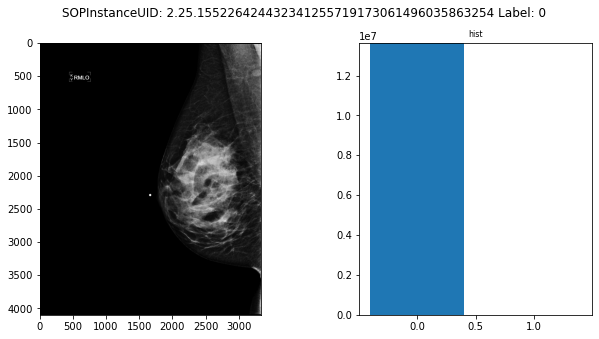

46
[4390715       1]


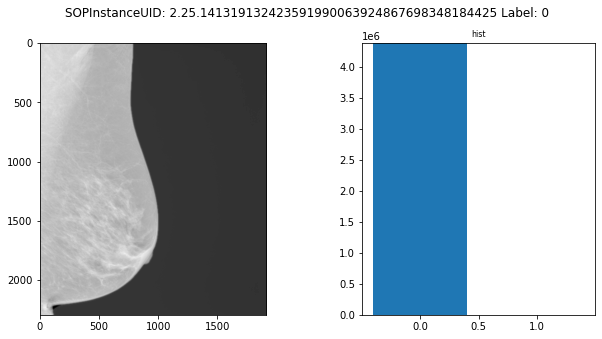

47
[4390715       1]


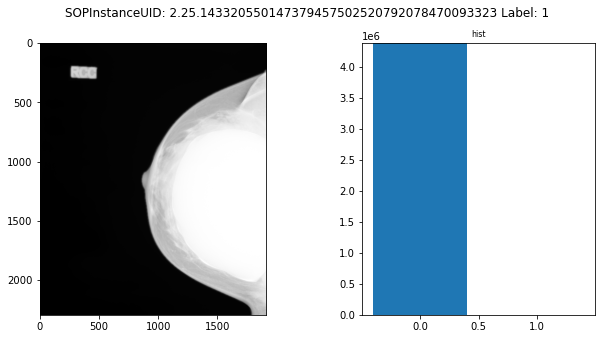

48
[4356839   33877]


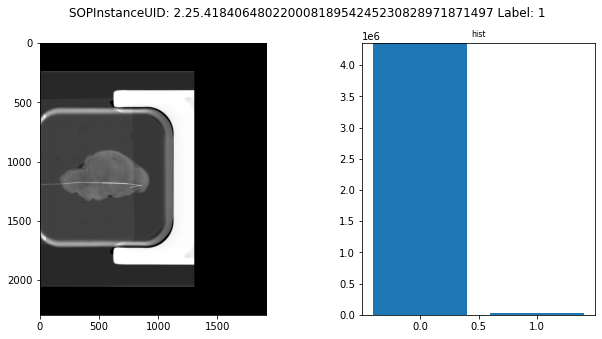

49
[4390715       1]


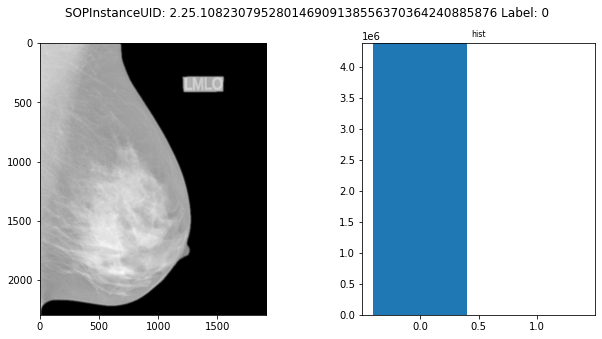

50
[7330427       1]


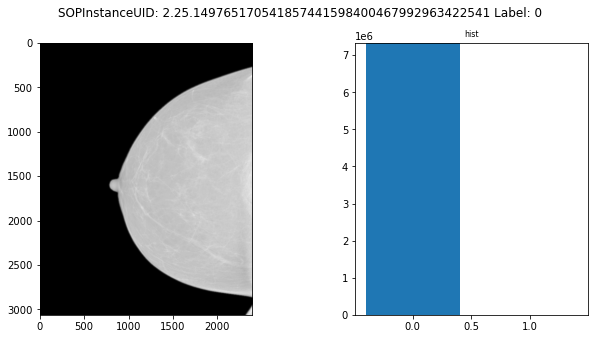

51
[7330351      77]


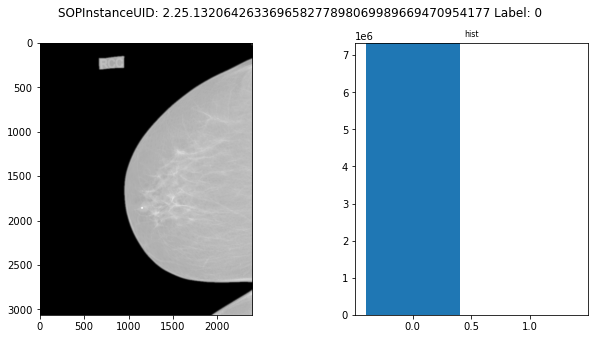

52
[7330427       1]


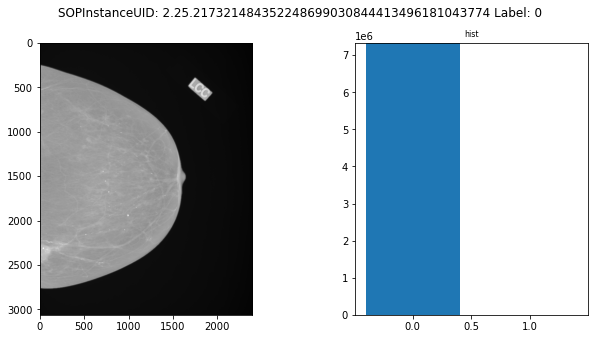

53
[7330427       1]


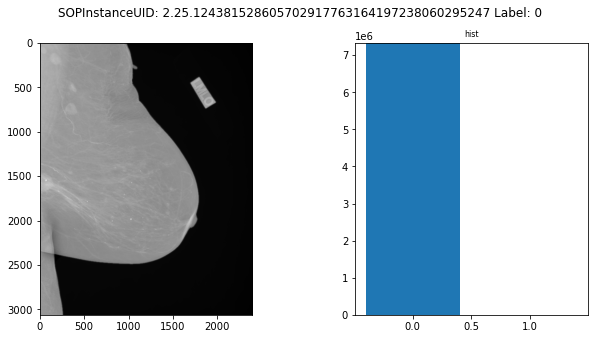

54
[13631336      152]


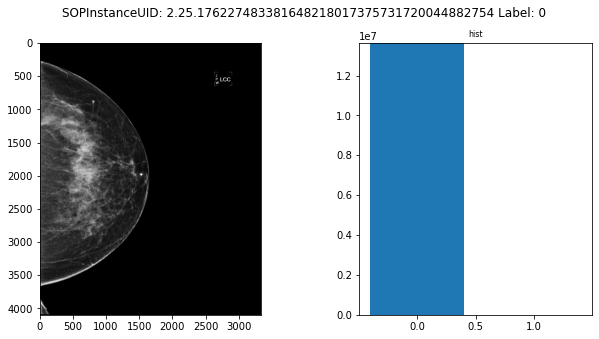

55
[7330427       1]


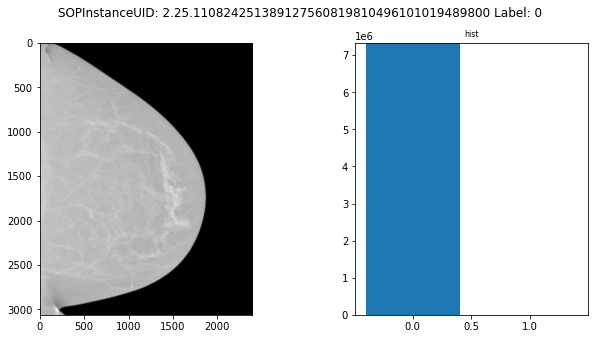

56
[4390715       1]


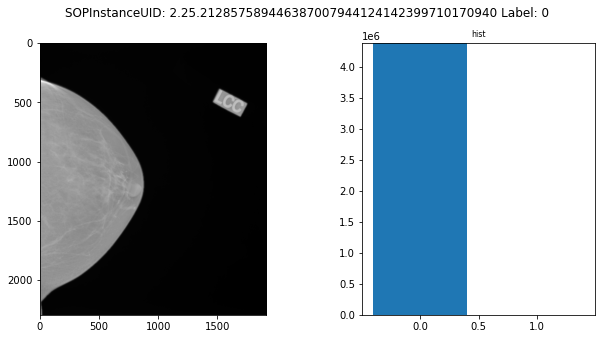

57
[13631334      154]


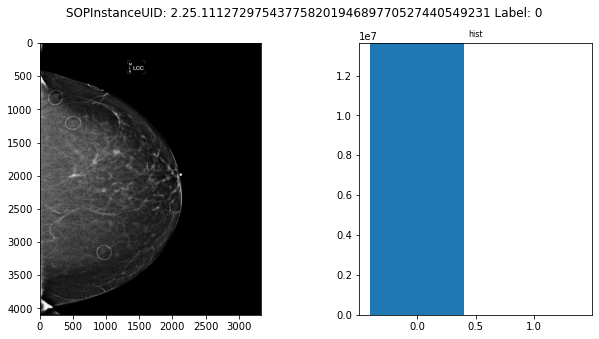

58
[4390715       1]


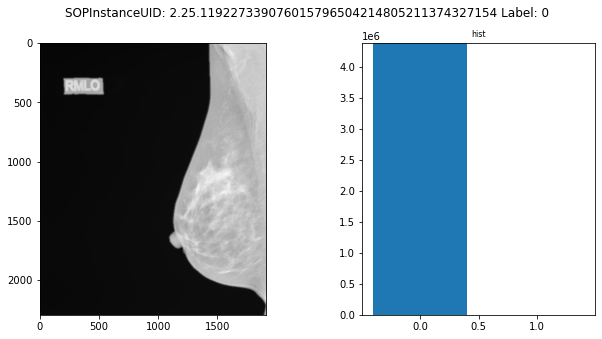

59
[7330427       1]


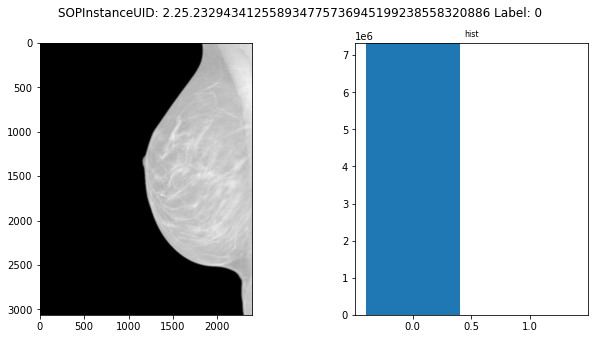

60
[7330356      72]


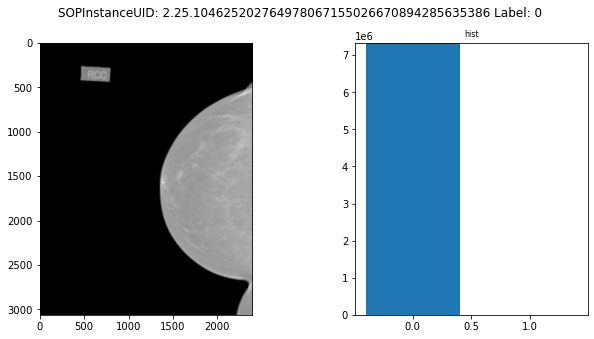

61
[4336744   53972]


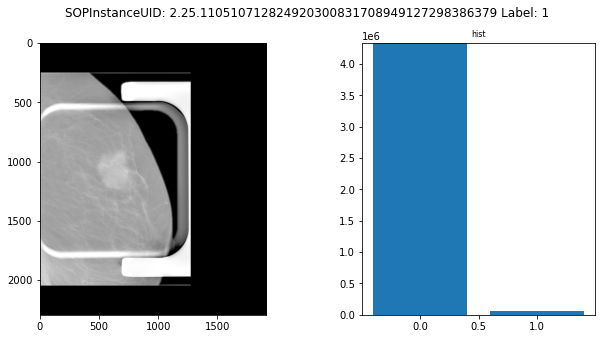

62
[4390715       1]


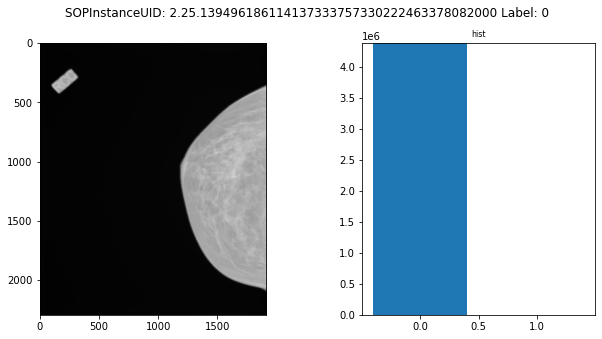

63
[4318970   71746]


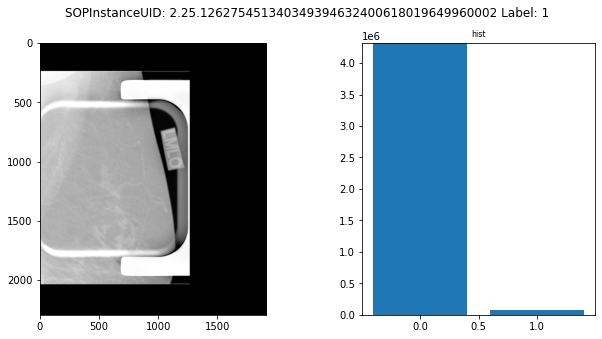

64
[7330427       1]


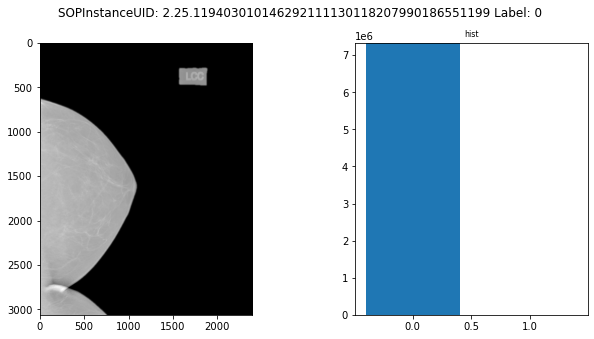

65
[7330427       1]


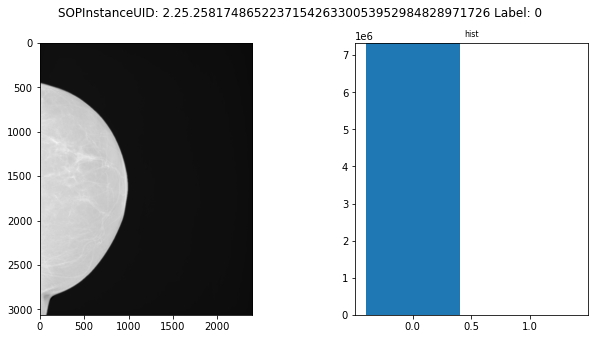

66
[8519212     468]


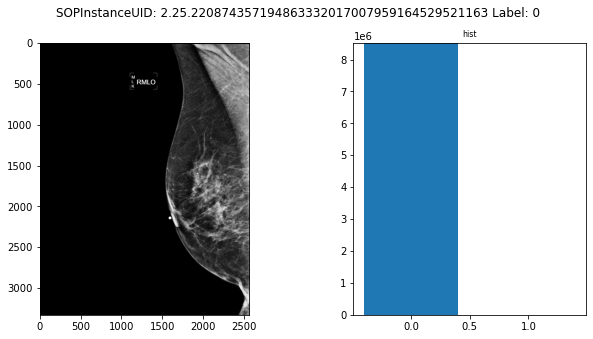

67
[8519223     457]


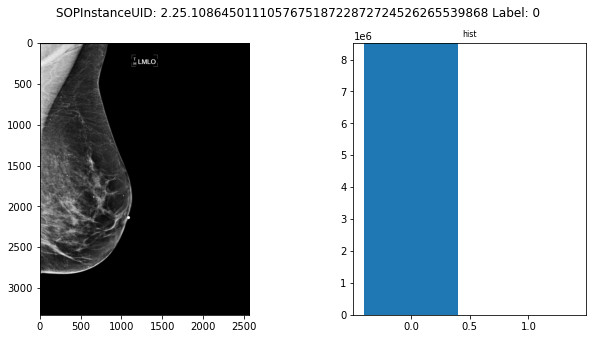

68
[7330427       1]


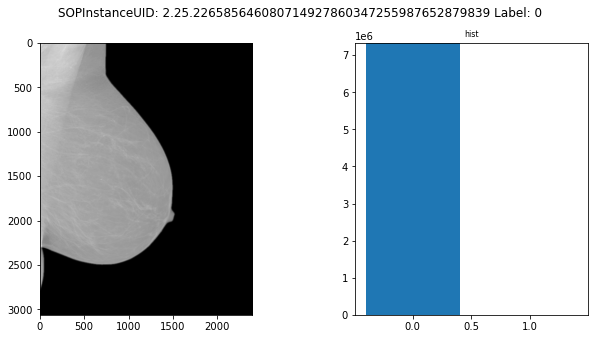

69
[4390715       1]


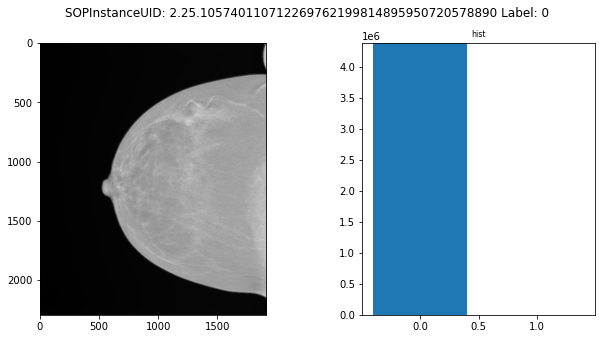

70
[4390715       1]


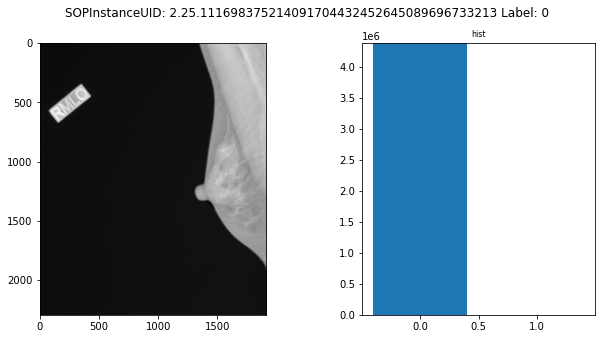

71
[4390715       1]


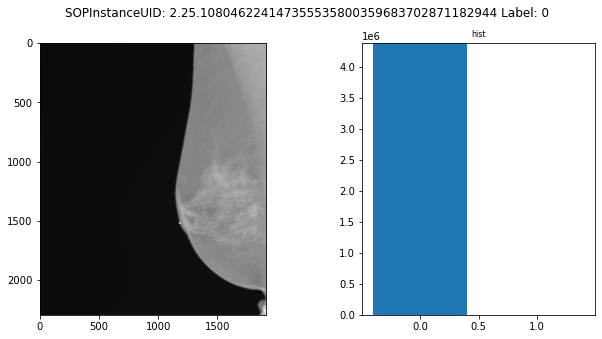

72
[4390715       1]


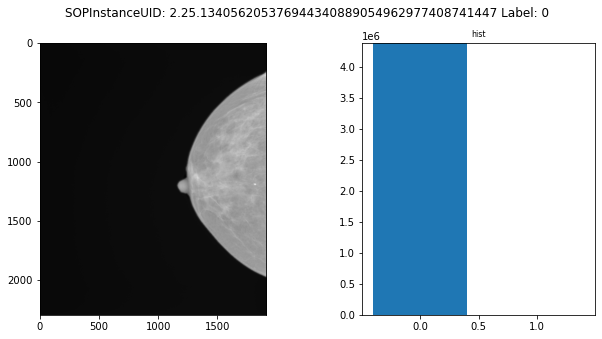

73
[7330427       1]


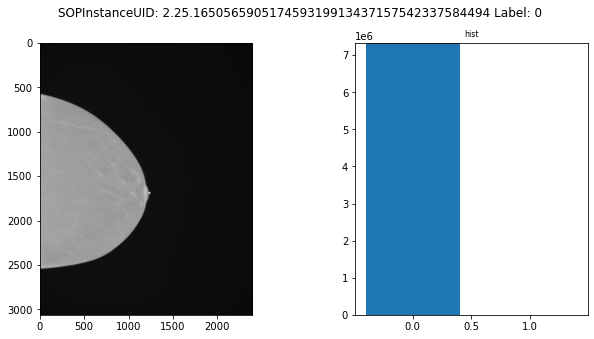

74
[4390715       1]


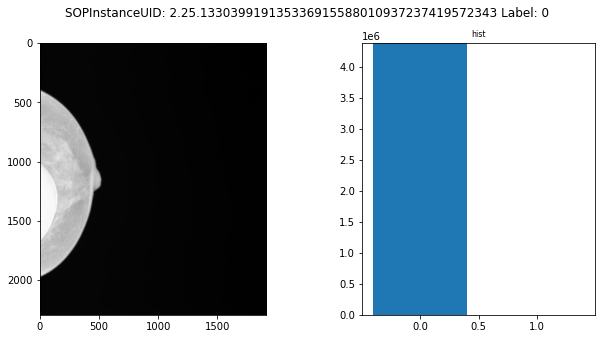

75
[7330427       1]


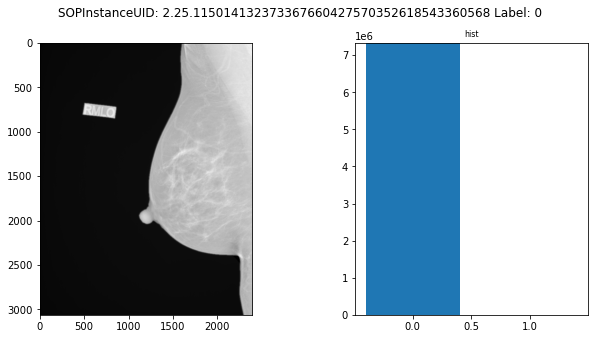

76
[4390715       1]


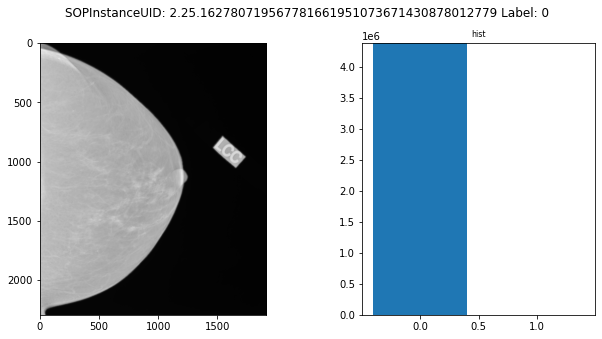

77
[7330427       1]


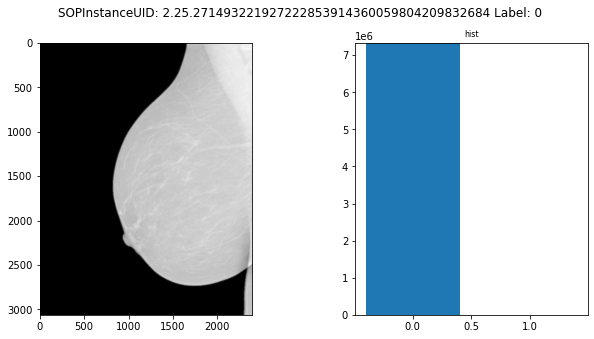

78
[7330427       1]


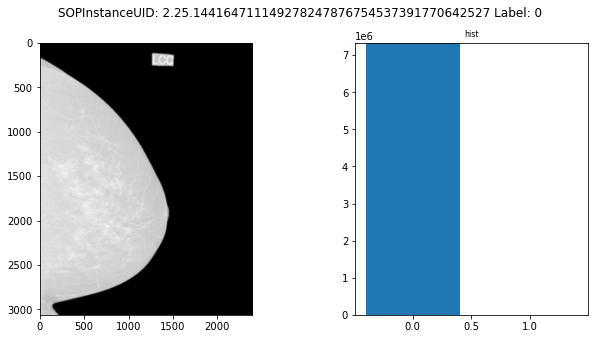

79
[4390715       1]


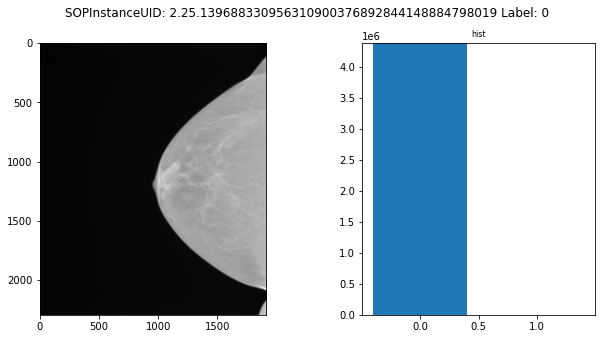

80
[4390715       1]


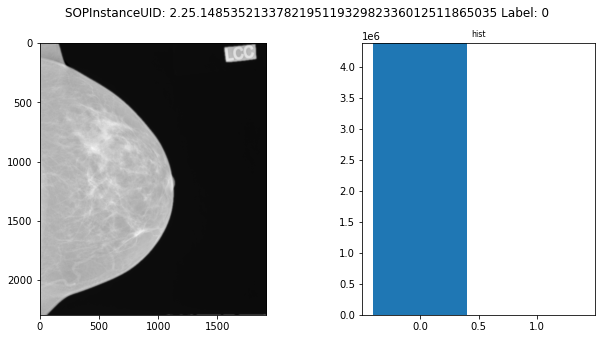

81
[8519214     466]


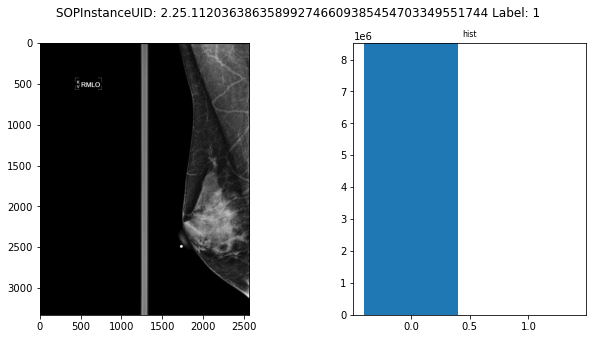

82
[7330427       1]


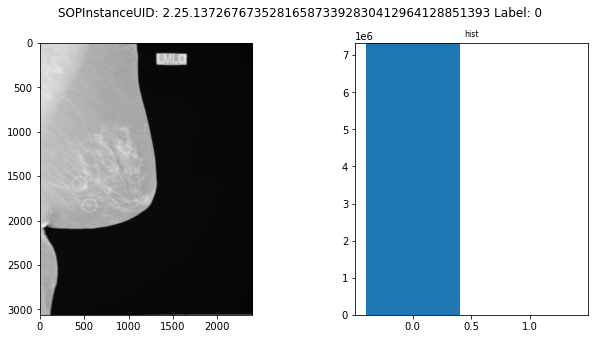

83
[7330427       1]


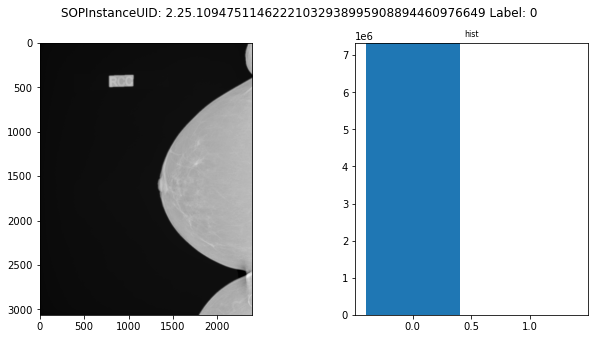

84
[7330262     166]


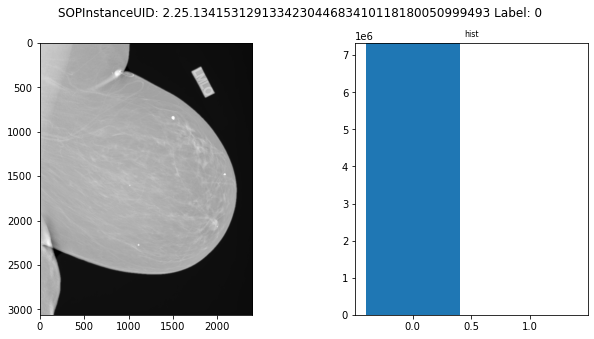

85
[7330427       1]


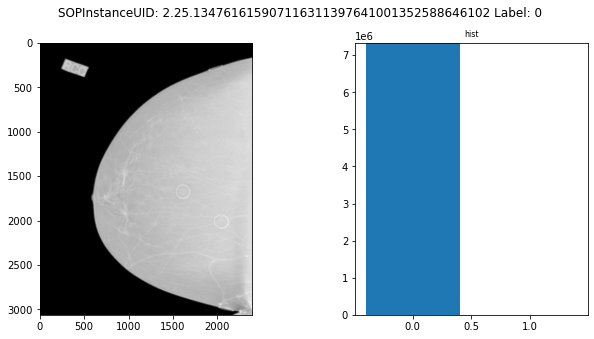

86
[8519517     163]


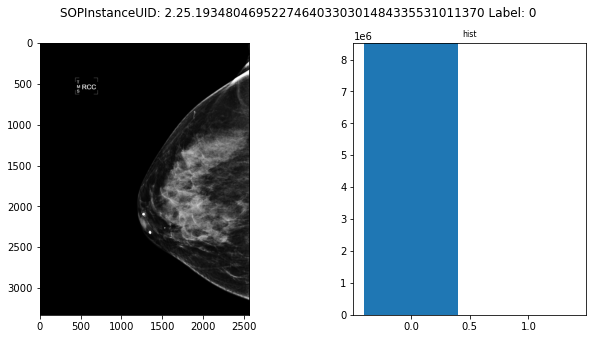

87
[4390715       1]


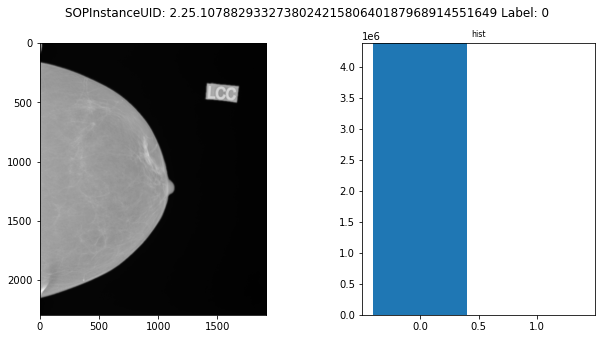

88
[7330427       1]


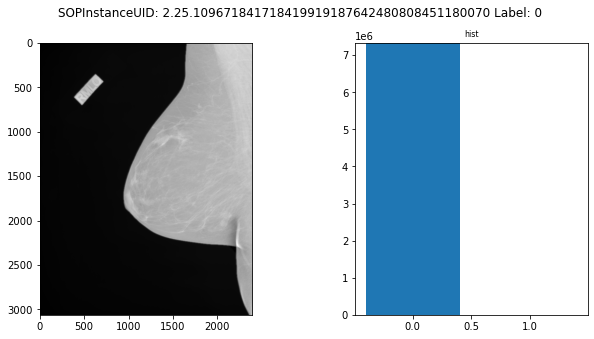

89
[4390715       1]


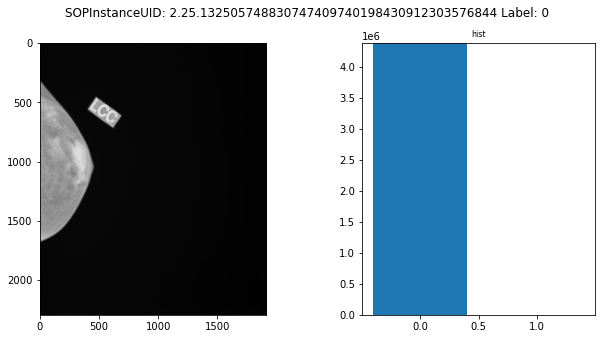

90
[4346864   43852]


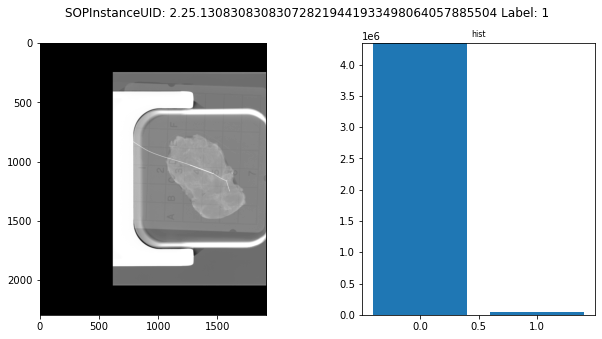

91
[4390715       1]


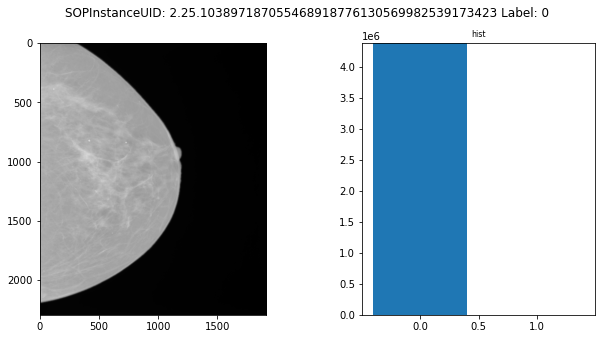

92
[4390715       1]


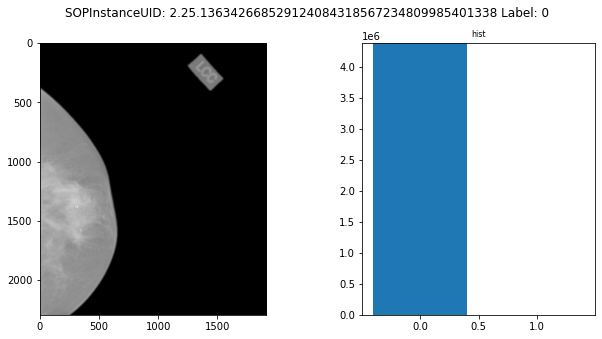

93
[4390715       1]


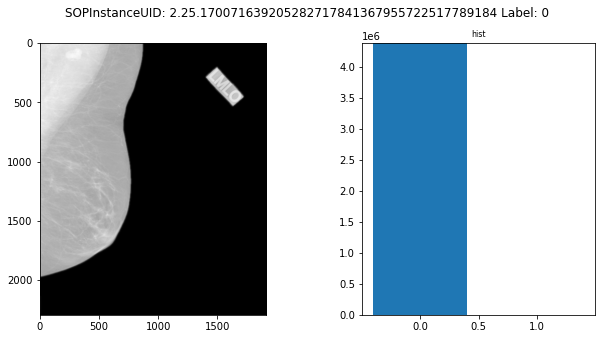

94
[4390715       1]


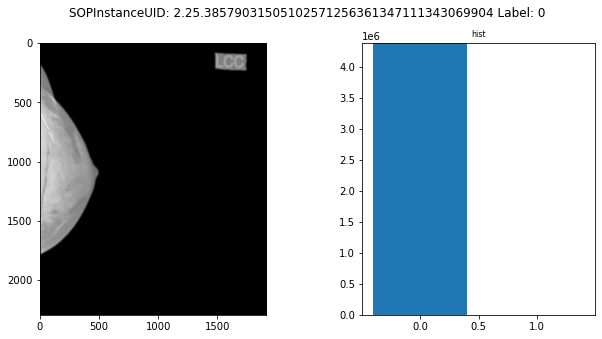

95
[7330427       1]


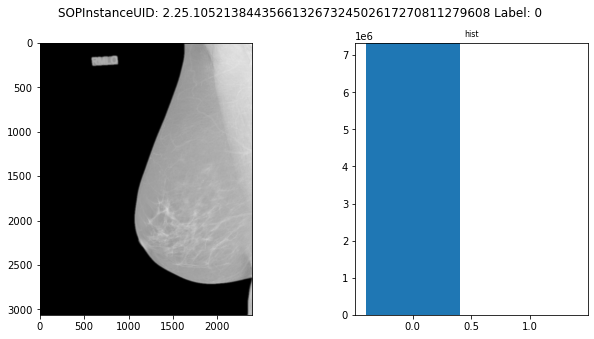

96
[13631487        1]


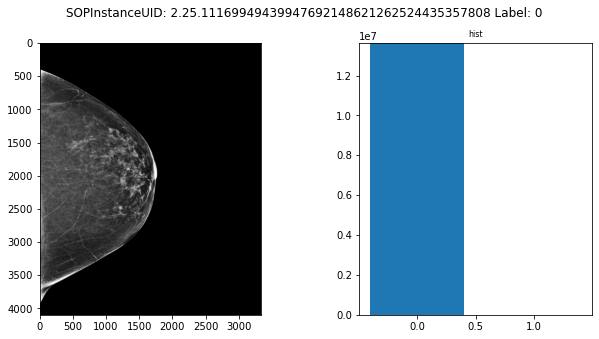

97
[7330427       1]


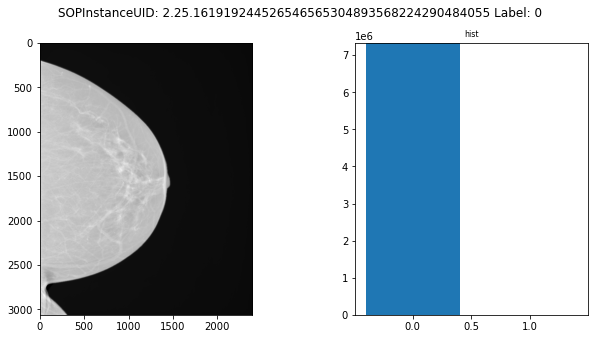

98
[7330427       1]


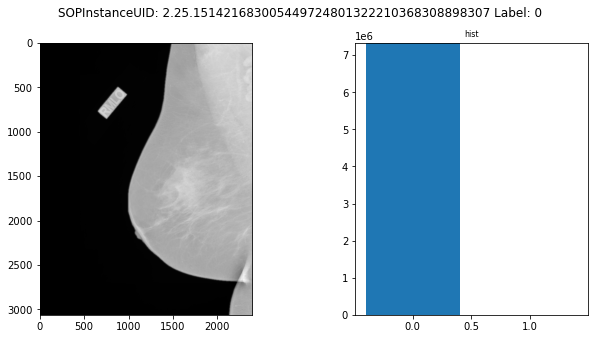

99
[13631325      163]


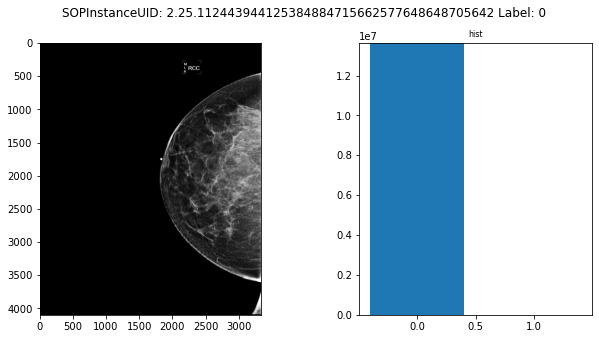

In [6]:
for i, img in enumerate(datasetA_X):
    print(i)
    O.Features.show_image_and_feature(img,features=[X_feat_vect[i]], feature_types=['hist'], label=str(labels[i]))

In [7]:
clf = KNN(method='mean')
clf.fit(X_feat_vect)
    
y_train_scores = clf.decision_scores_
pred_labels = clf.labels_
# y_test_scores = clf.decision_function(X_test)

In [8]:
eval = O.OutlierDetectorLite.evaluate(labels, pred_labels)

In [9]:
eval

{'groundtruth_indices': (array([27, 38, 47, 48, 61, 63, 81, 90]),),
 'pred_indices': (array([20, 38, 48, 61, 63, 66, 67, 81, 86, 90]),),
 'roc_auc': 0.8532608695652174,
 'f1_score': 0.6666666666666665,
 'acc_score': 0.94,
 'jaccard_score': 0.5,
 'precision_score': 0.6,
 'average_precision': 0.47,
 'recall_score': 0.75,
 'hamming_loss': 0.06,
 'log_loss': 2.07235856759185,
 'tn': 88,
 'fp': 4,
 'fn': 2,
 'tp': 6}